## Bibliotecas

In [170]:





%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')


## Funções Auxiliares

## Carregando os Dados

In [2]:

df = pd.read_csv("./final.csv")

In [3]:
explore(df)

dtypes  count  null_sum  null_pct  nunique  \
anoFundacao                  float64   6012         0     0.000       64   
ativoCirculante              float64   6012         0     0.000     1794   
capitalSocial                float64   6012         0     0.000      296   
cnpjSemTraco                  object   6012         0     0.000     1523   
custos                       float64   6010         2     0.000     1690   
dashboardCorrelacao          float64   6012         0     0.000      519   
dataAprovadoEmComite          object    443      5569     0.926      443   
dataAprovadoNivelAnalista     object   4652      1360     0.226     4652   
definicaoRisco                object   6012         0     0.000        4   
diferencaPercentualRisco     float64   6012         0     0.000       77   
duplicatasAReceber           float64   6012         0     0.000     1668   
empresa_MeEppMei                bool   6012         0     0.000        2   
endividamento                float64   6012         0     0.000     1185   
estoque                      float64   6012         0     0.000     1674   
faturamentoBruto             float64   6010         2     0.000     2231   
intervaloFundacao             object   6012         0     0.000        4   
limiteEmpresaAnaliseCredito  float64   6012         0     0.000     1378   
maiorAtraso                    int64   6012         0     0.000      153   
margemBruta                  float64   6010         2     0.000     1831   
margemBrutaAcumulada         float64   6012         0     0.000     1200   
nomeFantasia                  object   6012         0     0.000     1470   
numero_solicitacao             int64   6012         0     0.000     6012   
passivoCirculante            float64   6012         0     0.000     1789   
percentualProtestos          float64   5047       965     0.161        2   
percentualRisco              float64   6012         0     0.000       79   
periodoBalanco                object   6012         0     0.000      124   
periodoDemonstrativoEmMeses  float64   6010         2     0.000       12   
prazoMedioRecebimentoVendas    int64   6012         0     0.000      149   
primeiraCompra                object   5945        67     0.011     1206   
razaoSocial                   object   6012         0     0.000     1490   
restricoes                      bool   6012         0     0.000        2   
scorePontualidade            float64   6012         0     0.000      285   
status                        object   6012         0     0.000        7   
titulosEmAberto              float64   6012         0     0.000      563   
totalAtivo                   float64   6012         0     0.000     1788   
totalPatrimonioLiquido       float64   6012         0     0.000     1759   
valorAprovado                float64   5095       917     0.153      287   
valorSolicitado              float64   6012         0     0.000      318   

                                                   min        25%        50%  \
anoFundacao                                     1000.0     2000.0     2009.0   
ativoCirculante                                  -17.0   529853.0  3230248.0   
capitalSocial                                      0.0    95400.0   200000.0   
cnpjSemTraco                        AADG56617962174727          -          -   
custos                                    -346633805.0        0.0  2171507.0   
dashboardCorrelacao                           -0.99999        0.0        0.0   
dataAprovadoEmComite                                 -          -          -   
dataAprovadoNivelAnalista                            -          -          -   
definicaoRisco               De 0 a 10 % - Muito Baixo          -          -   
diferencaPercentualRisco                      0.207547   0.679245   0.785714   
duplicatasAReceber                         -22780710.0        0.0   878819.0   
empresa_MeEppMei                                 False        0.0        0.0   
endividamento            

In [4]:
df.drop(['valorAprovado', 'dataAprovadoEmComite', 'dataAprovadoNivelAnalista', 'percentualProtestos'], axis=1, inplace=True)

In [5]:
explore(df)

dtypes  count  null_sum  null_pct  nunique  \
anoFundacao                  float64   6012         0     0.000       64   
ativoCirculante              float64   6012         0     0.000     1794   
capitalSocial                float64   6012         0     0.000      296   
cnpjSemTraco                  object   6012         0     0.000     1523   
custos                       float64   6010         2     0.000     1690   
dashboardCorrelacao          float64   6012         0     0.000      519   
definicaoRisco                object   6012         0     0.000        4   
diferencaPercentualRisco     float64   6012         0     0.000       77   
duplicatasAReceber           float64   6012         0     0.000     1668   
empresa_MeEppMei                bool   6012         0     0.000        2   
endividamento                float64   6012         0     0.000     1185   
estoque                      float64   6012         0     0.000     1674   
faturamentoBruto             float64   6010         2     0.000     2231   
intervaloFundacao             object   6012         0     0.000        4   
limiteEmpresaAnaliseCredito  float64   6012         0     0.000     1378   
maiorAtraso                    int64   6012         0     0.000      153   
margemBruta                  float64   6010         2     0.000     1831   
margemBrutaAcumulada         float64   6012         0     0.000     1200   
nomeFantasia                  object   6012         0     0.000     1470   
numero_solicitacao             int64   6012         0     0.000     6012   
passivoCirculante            float64   6012         0     0.000     1789   
percentualRisco              float64   6012         0     0.000       79   
periodoBalanco                object   6012         0     0.000      124   
periodoDemonstrativoEmMeses  float64   6010         2     0.000       12   
prazoMedioRecebimentoVendas    int64   6012         0     0.000      149   
primeiraCompra                object   5945        67     0.011     1206   
razaoSocial                   object   6012         0     0.000     1490   
restricoes                      bool   6012         0     0.000        2   
scorePontualidade            float64   6012         0     0.000      285   
status                        object   6012         0     0.000        7   
titulosEmAberto              float64   6012         0     0.000      563   
totalAtivo                   float64   6012         0     0.000     1788   
totalPatrimonioLiquido       float64   6012         0     0.000     1759   
valorSolicitado              float64   6012         0     0.000      318   

                                                   min        25%        50%  \
anoFundacao                                     1000.0     2000.0     2009.0   
ativoCirculante                                  -17.0   529853.0  3230248.0   
capitalSocial                                      0.0    95400.0   200000.0   
cnpjSemTraco                        AADG56617962174727          -          -   
custos                                    -346633805.0        0.0  2171507.0   
dashboardCorrelacao                           -0.99999        0.0        0.0   
definicaoRisco               De 0 a 10 % - Muito Baixo          -          -   
diferencaPercentualRisco                      0.207547   0.679245   0.785714   
duplicatasAReceber                         -22780710.0        0.0   878819.0   
empresa_MeEppMei                                 False        0.0        0.0   
endividamento                                      0.0        0.0        0.0   
estoque                                      -263226.0    92461.0   891051.0   
faturamentoBruto                                   0.0  1940661.0  6551314.0   
intervaloFundacao                     Acima de 17 anos          -          -   
limiteEmpresaAnaliseCredito                        0.0     9900.0    86099.0   
maiorAtraso                                          0        3.0        8.0   
margemBru

### Retirando as colunas que não iremos usar na análise de clusters

In [6]:
df.drop(['numero_solicitacao', 'razaoSocial', 'nomeFantasia', 'anoFundacao', 'status', 'definicaoRisco', 'diferencaPercentualRisco', 'dashboardCorrelacao', 
         'periodoBalanco', 'primeiraCompra'], axis=1, inplace=True)

In [7]:
explore(df)

dtypes  count  null_sum  null_pct  nunique  \
ativoCirculante              float64   6012         0       0.0     1794   
capitalSocial                float64   6012         0       0.0      296   
cnpjSemTraco                  object   6012         0       0.0     1523   
custos                       float64   6010         2       0.0     1690   
duplicatasAReceber           float64   6012         0       0.0     1668   
empresa_MeEppMei                bool   6012         0       0.0        2   
endividamento                float64   6012         0       0.0     1185   
estoque                      float64   6012         0       0.0     1674   
faturamentoBruto             float64   6010         2       0.0     2231   
intervaloFundacao             object   6012         0       0.0        4   
limiteEmpresaAnaliseCredito  float64   6012         0       0.0     1378   
maiorAtraso                    int64   6012         0       0.0      153   
margemBruta                  float64   6010         2       0.0     1831   
margemBrutaAcumulada         float64   6012         0       0.0     1200   
passivoCirculante            float64   6012         0       0.0     1789   
percentualRisco              float64   6012         0       0.0       79   
periodoDemonstrativoEmMeses  float64   6010         2       0.0       12   
prazoMedioRecebimentoVendas    int64   6012         0       0.0      149   
restricoes                      bool   6012         0       0.0        2   
scorePontualidade            float64   6012         0       0.0      285   
titulosEmAberto              float64   6012         0       0.0      563   
totalAtivo                   float64   6012         0       0.0     1788   
totalPatrimonioLiquido       float64   6012         0       0.0     1759   
valorSolicitado              float64   6012         0       0.0      318   

                                            min        25%        50%  \
ativoCirculante                           -17.0   529853.0  3230248.0   
capitalSocial                               0.0    95400.0   200000.0   
cnpjSemTraco                 AADG56617962174727          -          -   
custos                             -346633805.0        0.0  2171507.0   
duplicatasAReceber                  -22780710.0        0.0   878819.0   
empresa_MeEppMei                          False        0.0        0.0   
endividamento                               0.0        0.0        0.0   
estoque                               -263226.0    92461.0   891051.0   
faturamentoBruto                            0.0  1940661.0  6551314.0   
intervaloFundacao              Acima de 17 anos          -          -   
limiteEmpresaAnaliseCredito                 0.0     9900.0    86099.0   
maiorAtraso                                   0        3.0        8.0   
margemBruta                        -614872100.0        0.0  1773951.0   
margemBrutaAcumulada                        0.0   0.285525   0.402895   
passivoCirculante                    -1134941.0   93264.75  1103291.0   
percentualRisco                             0.0   0.142857   0.214286   
periodoDemonstrativoEmMeses                 1.0       12.0       12.0   
prazoMedioRecebimentoVendas                   0        0.0        0.0   
restricoes                                False        0.0        0.0   
scorePontualidade                           0.0   0.885616        1.0   
titulosEmAberto                             0.0        0.0     2070.0   
totalAtivo                                -17.0   636584.0  3779529.5   
totalPatrimonioLiquido             -186719734.0   100000.0  1315495.0   
valorSolicitado                           100.0    40000.0    70000.0   

                                    75%                 max             mean  \
ativoCirculante              13960113.0       29038320000.0  39651462.462409   
capitalSocial                  800000.0        4100000000.0  11238712.395376   
cnpjSemTraco                          -  ZZVU59020803434073    

In [8]:
df1 = df.copy()

In [9]:
df1.drop_duplicates(subset='cnpjSemTraco', keep='last', inplace=True)

In [10]:
explore(df1)

dtypes  count  null_sum  null_pct  nunique  \
ativoCirculante              float64   1523         0       0.0     1178   
capitalSocial                float64   1523         0       0.0      284   
cnpjSemTraco                  object   1523         0       0.0     1523   
custos                       float64   1523         0       0.0     1033   
duplicatasAReceber           float64   1523         0       0.0     1042   
empresa_MeEppMei                bool   1523         0       0.0        2   
endividamento                float64   1523         0       0.0      636   
estoque                      float64   1523         0       0.0     1105   
faturamentoBruto             float64   1523         0       0.0     1415   
intervaloFundacao             object   1523         0       0.0        4   
limiteEmpresaAnaliseCredito  float64   1523         0       0.0      861   
maiorAtraso                    int64   1523         0       0.0      153   
margemBruta                  float64   1523         0       0.0     1068   
margemBrutaAcumulada         float64   1523         0       0.0     1200   
passivoCirculante            float64   1523         0       0.0     1168   
percentualRisco              float64   1523         0       0.0       63   
periodoDemonstrativoEmMeses  float64   1523         0       0.0       12   
prazoMedioRecebimentoVendas    int64   1523         0       0.0      149   
restricoes                      bool   1523         0       0.0        2   
scorePontualidade            float64   1523         0       0.0      285   
titulosEmAberto              float64   1523         0       0.0      563   
totalAtivo                   float64   1523         0       0.0     1180   
totalPatrimonioLiquido       float64   1523         0       0.0     1166   
valorSolicitado              float64   1523         0       0.0      159   

                                            min        25%        50%  \
ativoCirculante                             0.0   298293.0  2451304.0   
capitalSocial                               0.0    80000.0   150000.0   
cnpjSemTraco                 AADG56617962174727          -          -   
custos                                -431401.0        0.0  1565850.0   
duplicatasAReceber                  -22780710.0        0.0   567455.0   
empresa_MeEppMei                          False        0.0        0.0   
endividamento                               0.0        0.0        0.0   
estoque                                     0.0     8667.5   605595.0   
faturamentoBruto                            0.0  1672928.5  4925896.0   
intervaloFundacao              Acima de 17 anos          -          -   
limiteEmpresaAnaliseCredito                 0.0     9900.0    72600.0   
maiorAtraso                                   0        0.0        5.0   
margemBruta                        -614872100.0        0.0  1364721.0   
margemBrutaAcumulada                        0.0   0.220215   0.386633   
passivoCirculante                    -1134941.0    44519.5   779307.0   
percentualRisco                             0.0   0.142857   0.214286   
periodoDemonstrativoEmMeses                 1.0       12.0       12.0   
prazoMedioRecebimentoVendas                   0        0.0        0.0   
restricoes                                False        0.0        0.0   
scorePontualidade                           0.0   0.791796        1.0   
titulosEmAberto                             0.0        0.0        0.0   
totalAtivo                                  0.0   364756.0  2846875.0   
totalPatrimonioLiquido             -186719734.0    49100.5  1101916.0   
valorSolicitado                           100.0    30000.0    60000.0   

                                    75%                 max             mean  \
ativoCirculante              11347037.5       29038320000.0  53918426.858831   
capitalSocial                  600000.0        4100000000.0  16456989.209455   
cnpjSemTraco                          -  ZZVU59020803434073    

In [11]:
df1.drop(['cnpjSemTraco', 'intervaloFundacao'], axis=1, inplace=True)

In [103]:

df1.restricoes = df1.restricoes.apply(lambda x:1 if x else 0)
df1.empresa_MeEppMei = df1.empresa_MeEppMei.apply(lambda x:1 if x else 0)


In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523 entries, 28 to 6011
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  1523 non-null   int64  
 1   margemBrutaAcumulada         1523 non-null   float64
 2   prazoMedioRecebimentoVendas  1523 non-null   int64  
 3   titulosEmAberto              1523 non-null   float64
 4   valorSolicitado              1523 non-null   float64
 5   percentualRisco              1523 non-null   float64
 6   ativoCirculante              1523 non-null   float64
 7   passivoCirculante            1523 non-null   float64
 8   totalAtivo                   1523 non-null   float64
 9   totalPatrimonioLiquido       1523 non-null   float64
 10  endividamento                1523 non-null   float64
 11  duplicatasAReceber           1523 non-null   float64
 12  estoque                      1523 non-null   float64
 13  faturamentoBruto 

In [107]:
fig = px.box(df1)
fig.show()

In [118]:
df1[df1.totalAtivo == df1.totalAtivo.max()]
df1.drop([2238], inplace=True)

In [119]:
fig = px.box(df1)
fig.show()

In [45]:
def calculate_wcss(data, num):
        wcss = []
        for n in range(2, num):
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X=data)
            wcss.append(kmeans.inertia_)
    
        return wcss
    
def calculate_silhouete(data, num):
        silhouete_avg = []
        for n in range(2, num):
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X=data)
            cluster_labels = kmeans.labels_
            silhouete_avg.append(silhouette_score(data, cluster_labels))
    
        return silhouete_avg

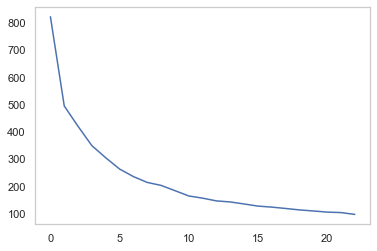

In [182]:
w = calculate_wcss(x, 25)
plt.plot(w)

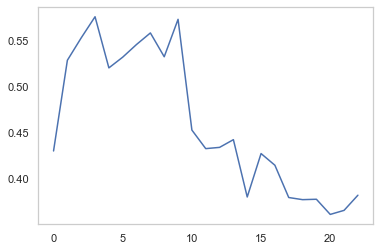

In [183]:
w = calculate_silhouete(x, 25)
plt.plot(w)

In [171]:
x = MinMaxScaler().fit_transform(df1)

In [172]:
fig = px.box(x)
fig.show()

In [173]:
x[0]

array([2.04708291e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.31666722e-05, 4.28352881e-01, 5.03886697e-05, 1.07798434e-04,
       2.49185362e-05, 2.03130220e-02, 0.00000000e+00, 1.00699984e-02,
       1.55466713e-04, 9.71582364e-05, 1.54423117e-01, 1.00000000e+00,
       0.00000000e+00, 9.75609756e-06, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 5.47040047e-06, 1.00000000e+00, 1.00000000e+00])

In [125]:
pca = PCA()
principalComponents = pca.fit(x)

In [126]:
cumsum = np.cumsum(principalComponents.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95) + 1
d

16

In [127]:
pca = PCA(n_components=16)
X = pca.fit_transform(x)

In [128]:
np.random.seed(13)
km = KMeans(n_clusters=9, n_init=20)
df1['kmeans'] = km.fit_predict(x)

(0.0, 2.0)

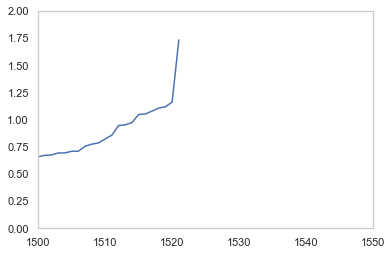

In [175]:
neighbors = NearestNeighbors(n_neighbors=44)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlim(1500,1550)
plt.ylim(0,2)

In [178]:
db = DBSCAN(eps=1, min_samples=44)
df1['dbscan'] = db.fit_predict(x)

In [131]:
df1.groupby('kmeans').count()

maiorAtraso  margemBrutaAcumulada  prazoMedioRecebimentoVendas  \
kmeans                                                                   
0               808                   808                          808   
1                 1                     1                            1   
2               393                   393                          393   
3                15                    15                           15   
4               305                   305                          305   

        titulosEmAberto  valorSolicitado  percentualRisco  ativoCirculante  \
kmeans                                                                       
0                   808              808              808              808   
1                     1                1                1                1   
2                   393              393              393              393   
3                    15               15               15               15   
4                   305              305              305              305   

        passivoCirculante  totalAtivo  totalPatrimonioLiquido  ...  \
kmeans                                                         ...   
0                     808         808                     808  ...   
1                       1           1                       1  ...   
2                     393         393                     393  ...   
3                      15          15                      15  ...   
4                     305         305                     305  ...   

        faturamentoBruto  margemBruta  periodoDemonstrativoEmMeses  custos  \
kmeans                                                                       
0                    808          808                          808     808   
1                      1            1                            1       1   
2                    393          393                          393     393   
3                     15           15                           15      15   
4                    305          305                          305     305   

        capitalSocial  restricoes  empresa_MeEppMei  scorePontualidade  \
kmeans                                                                   
0                 808         808               808                808   
1                   1           1                 1                  1   
2                 393         393               393                393   
3                  15          15                15                 15   
4                 305         305               305                305   

        limiteEmpresaAnaliseCredito  dbscan  
kmeans                                       
0                               808     808  
1                                 1       1  
2                               393     393  
3                                15      15  
4                               305     305  

[5 rows x 23 columns]

In [179]:
df1.groupby('dbscan').count()

maiorAtraso  margemBrutaAcumulada  prazoMedioRecebimentoVendas  \
dbscan                                                                   
-1              120                   120                          120   
 0              451                   451                          451   
 1              710                   710                          710   
 2              174                   174                          174   
 3               67                    67                           67   

        titulosEmAberto  valorSolicitado  percentualRisco  ativoCirculante  \
dbscan                                                                       
-1                  120              120              120              120   
 0                  451              451              451              451   
 1                  710              710              710              710   
 2                  174              174              174              174   
 3                   67               67               67               67   

        passivoCirculante  totalAtivo  totalPatrimonioLiquido  ...  \
dbscan                                                         ...   
-1                    120         120                     120  ...   
 0                    451         451                     451  ...   
 1                    710         710                     710  ...   
 2                    174         174                     174  ...   
 3                     67          67                      67  ...   

        faturamentoBruto  margemBruta  periodoDemonstrativoEmMeses  custos  \
dbscan                                                                       
-1                   120          120                          120     120   
 0                   451          451                          451     451   
 1                   710          710                          710     710   
 2                   174          174                          174     174   
 3                    67           67                           67      67   

        capitalSocial  restricoes  empresa_MeEppMei  scorePontualidade  \
dbscan                                                                   
-1                120         120               120                120   
 0                451         451               451                451   
 1                710         710               710                710   
 2                174         174               174                174   
 3                 67          67                67                 67   

        limiteEmpresaAnaliseCredito  kmeans  
dbscan                                       
-1                              120     120  
 0                              451     451  
 1                              710     710  
 2                              174     174  
 3                               67      67  

[5 rows x 23 columns]

In [157]:
with pd.ExcelWriter("df1_excel.xlsx") as writer:
    df1.to_excel(writer)

In [100]:
explore(df1)

dtypes  count  null_sum  null_pct  nunique  \
maiorAtraso                    int64   1523         0       0.0      153   
margemBrutaAcumulada         float64   1523         0       0.0     1200   
prazoMedioRecebimentoVendas    int64   1523         0       0.0      149   
titulosEmAberto              float64   1523         0       0.0      563   
valorSolicitado              float64   1523         0       0.0      159   
percentualRisco              float64   1523         0       0.0       63   
ativoCirculante              float64   1523         0       0.0     1178   
passivoCirculante            float64   1523         0       0.0     1168   
totalAtivo                   float64   1523         0       0.0     1180   
totalPatrimonioLiquido       float64   1523         0       0.0     1166   
endividamento                float64   1523         0       0.0      636   
duplicatasAReceber           float64   1523         0       0.0     1042   
estoque                      float64   1523         0       0.0     1105   
faturamentoBruto             float64   1523         0       0.0     1415   
margemBruta                  float64   1523         0       0.0     1068   
periodoDemonstrativoEmMeses  float64   1523         0       0.0       12   
custos                       float64   1523         0       0.0     1033   
capitalSocial                float64   1523         0       0.0      284   
restricoes                      bool   1523         0       0.0        2   
empresa_MeEppMei                bool   1523         0       0.0        2   
scorePontualidade            float64   1523         0       0.0      285   
limiteEmpresaAnaliseCredito  float64   1523         0       0.0      861   
kmeans                         int32   1523         0       0.0        8   

                                     min          25%          50%  \
maiorAtraso                            0        0.000        5.000   
margemBrutaAcumulada                 0.0        0.220        0.387   
prazoMedioRecebimentoVendas            0        0.000        0.000   
titulosEmAberto                      0.0        0.000        0.000   
valorSolicitado                    100.0    30000.000    60000.000   
percentualRisco                      0.0        0.143        0.214   
ativoCirculante                      0.0   298293.000  2451304.000   
passivoCirculante             -1134941.0    44519.500   779307.000   
totalAtivo                           0.0   364756.000  2846875.000   
totalPatrimonioLiquido      -186719734.0    49100.500  1101916.000   
endividamento                        0.0        0.000        0.000   
duplicatasAReceber           -22780710.0        0.000   567455.000   
estoque                              0.0     8667.500   605595.000   
faturamentoBruto                     0.0  1672928.500  4925896.000   
margemBruta                 -614872100.0        0.000  1364721.000   
periodoDemonstrativoEmMeses          1.0       12.000       12.000   
custos                         -431401.0        0.000  1565850.000   
capitalSocial                        0.0    80000.000   150000.000   
restricoes                         False        0.000        0.000   
empresa_MeEppMei                   False        0.000        0.000   
scorePontualidade                    0.0        0.792        1.000   
limiteEmpresaAnaliseCredito          0.0     9900.000    72600.000   
kmeans                                 0        1.000        1.000   

                                      75%            max          mean  \
maiorAtraso                  2.000000e+01            977  2.312500e+01   
margemBrutaAcumulada         4.950000e-01            1.0  3.400000e-01   
prazoMedioRecebimentoVendas  2.100000e+01           1605  2.012000e+01   
titulosEmAberto              9.940000e+03      2836656.0  4.092816e+04   
valorSolicitado              1.635000e+05    600000000.0  6.168863e+05   
percentualRisco              3.040000e-01       0.660714  2.220000e-01   
ativoC

In [158]:
df[df.index==2238]

cnpjSemTraco  maiorAtraso  margemBrutaAcumulada  \
2238  QYTD37249525966867            0                   0.0   

      prazoMedioRecebimentoVendas  titulosEmAberto  valorSolicitado  \
2238                            0              0.0         500000.0   

      percentualRisco  ativoCirculante  passivoCirculante    totalAtivo  ...  \
2238         0.053571     2.903832e+10       2.750382e+10  5.482350e+10  ...   

      faturamentoBruto  margemBruta  periodoDemonstrativoEmMeses  custos  \
2238      4.464000e+09          0.0                         12.0     0.0   

      intervaloFundacao  capitalSocial  restricoes  empresa_MeEppMei  \
2238   Acima de 17 anos            0.0       False             False   

     scorePontualidade  limiteEmpresaAnaliseCredito  
2238               0.0                          0.0  

[1 rows x 24 columns]